# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv('stock_data.csv')

### Checking the shape of the dataset

In [3]:
data.shape


(340, 15)

- There are 340 rows and 15 columns in the data set

### Displaying few rows of the dataset

In [4]:
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Creating a copy of original data

In [5]:
df = data.copy()

### Checking the data types of the columns for the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations**

- There are 4 objects and 11 numerical columns in the dataset 


### Checking for duplicates and missing values

In [7]:
df.duplicated().sum()

0

In [8]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There is no duplicate and missing value in the dataset

### Statistical summary of the dataset

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


**Observations**

- There are 340 rows indicating stocks from 340 companies

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

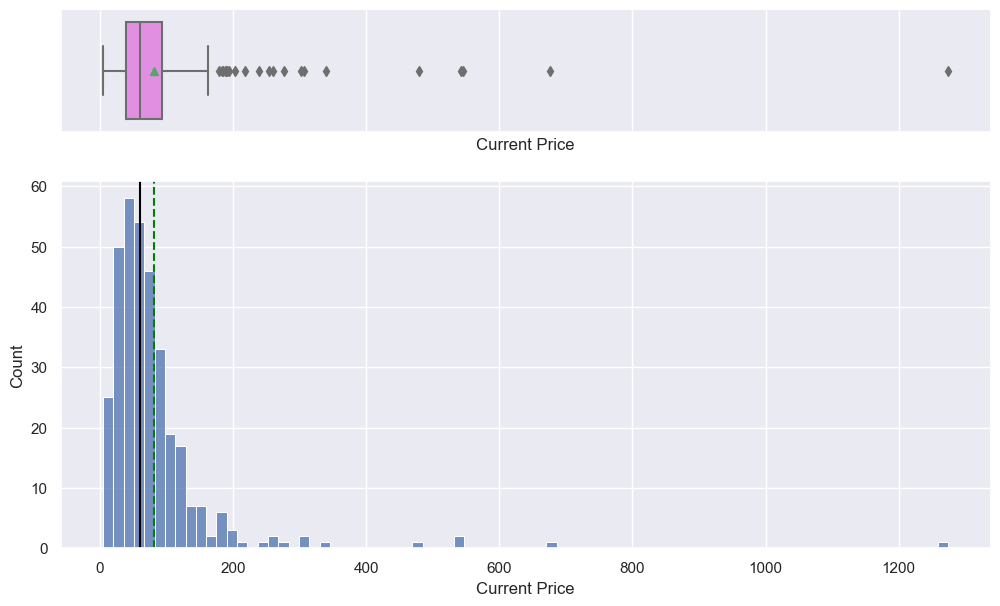

In [11]:
histogram_boxplot(df, 'Current Price')

* The Current Price distribution exhibits a significant right-skewness, indicating a majority of stock prices falling below 200 USD. However, a subset of stocks displays exceptionally high values, exceeding 1200 USD.

**`Price Change`**

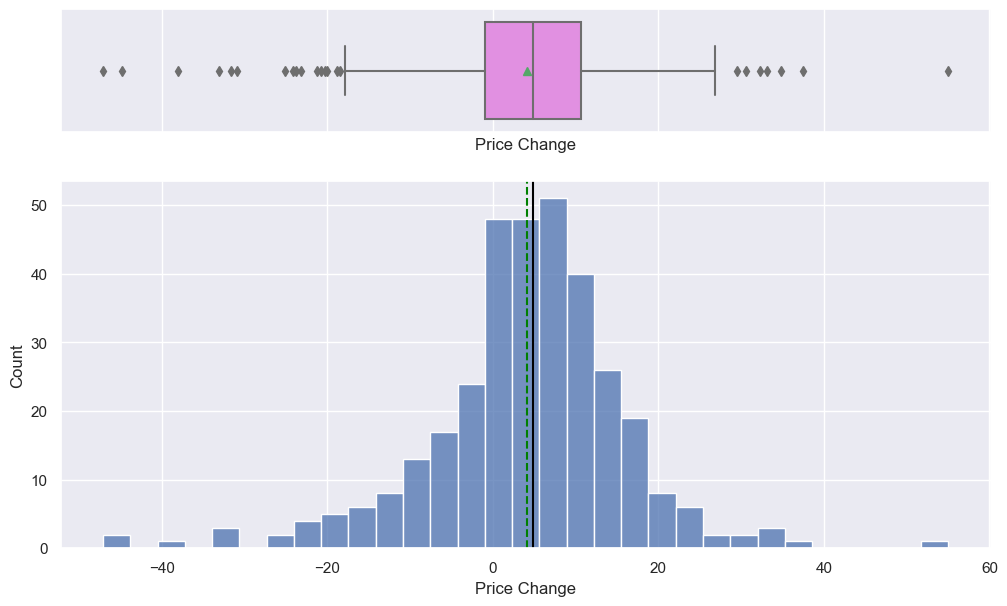

In [12]:
histogram_boxplot(df,'Price Change') 

* The Price Change follows a normal distribution, with an average value of around 5%. This suggests that, on average, the stock price has increased by 5% over the past 13 months. However, during the same period, a subset of stocks experienced significant fluctuations, with some losing 50% of their value and others gaining 50% of their value.

**`Volatility`**

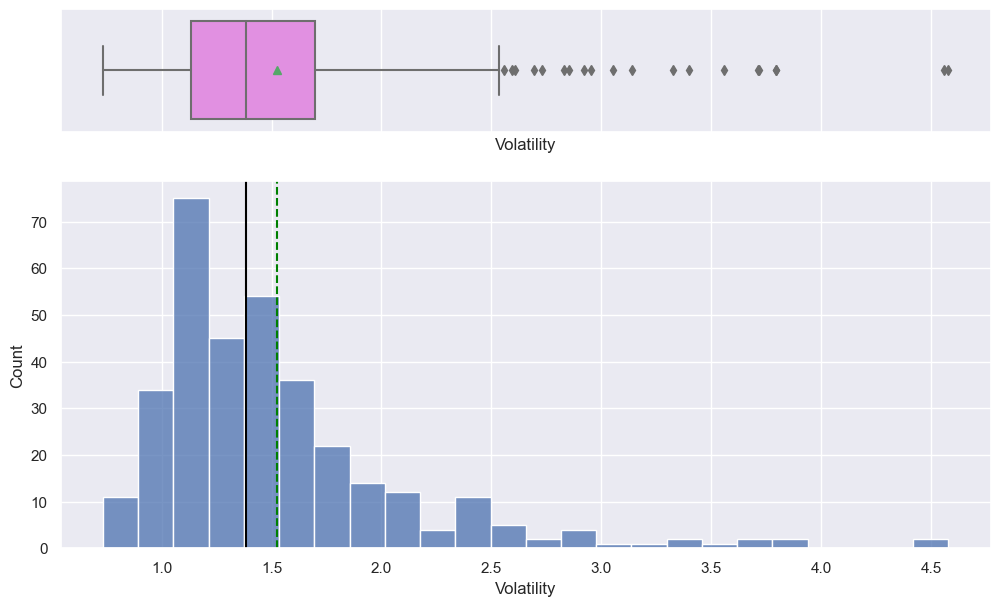

In [13]:
histogram_boxplot(df,'Volatility')  

* The distribution of Volatility is right-skewed, indicating that the majority of observed volatility values are concentrated in the range of 1 to 1.5. However, there are a few outliers with significantly higher values, around 4.5.

**`ROE`**

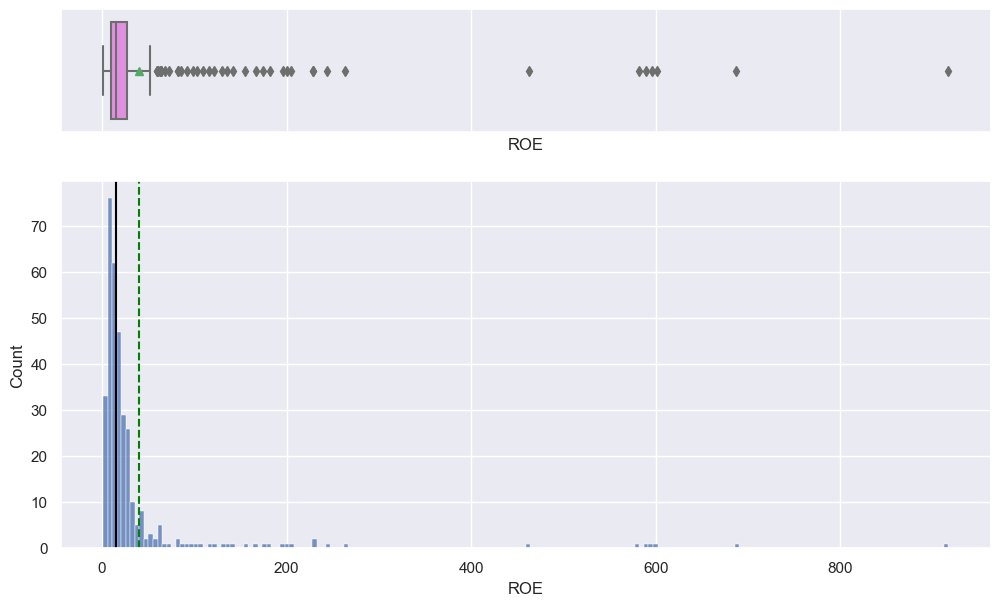

In [14]:
histogram_boxplot(df,'ROE')  ## Complete the code to create histogram_boxplot for 'ROE'

* The distribution of Return on Equity (ROE) is right-skewed, with a presence of outliers exceeding 800. However, the majority of companies demonstrate profitability, indicating that they generate positive returns on equity.

**`Cash Ratio`**

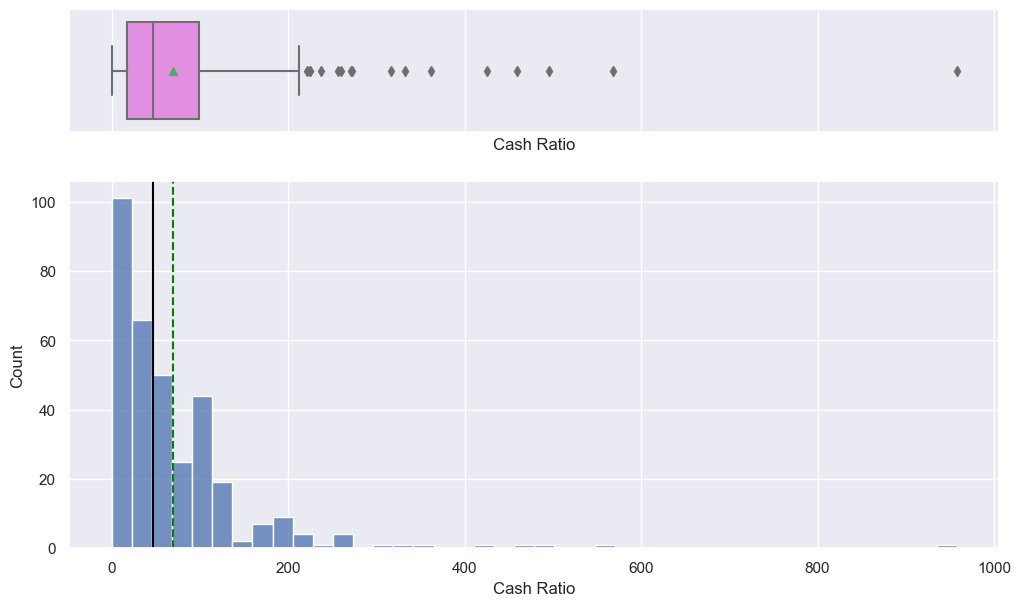

In [15]:
histogram_boxplot(df,'Cash Ratio')  ## Complete the code to create histogram_boxplot for 'Cash Ratio'

Similar to ROE, Cash Ration has right-skewed distribution 

**`Net Cash Flow`**

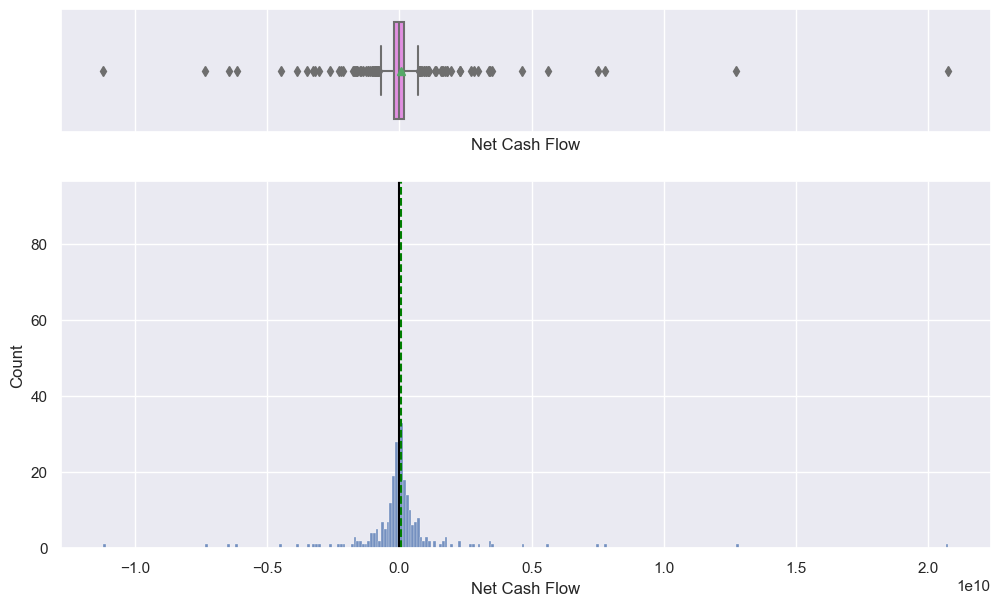

In [17]:
histogram_boxplot(df, 'Net Cash Flow')  ## Complete the code to create histogram_boxplot for 'Net Cash Flow'

**`Net Income`**

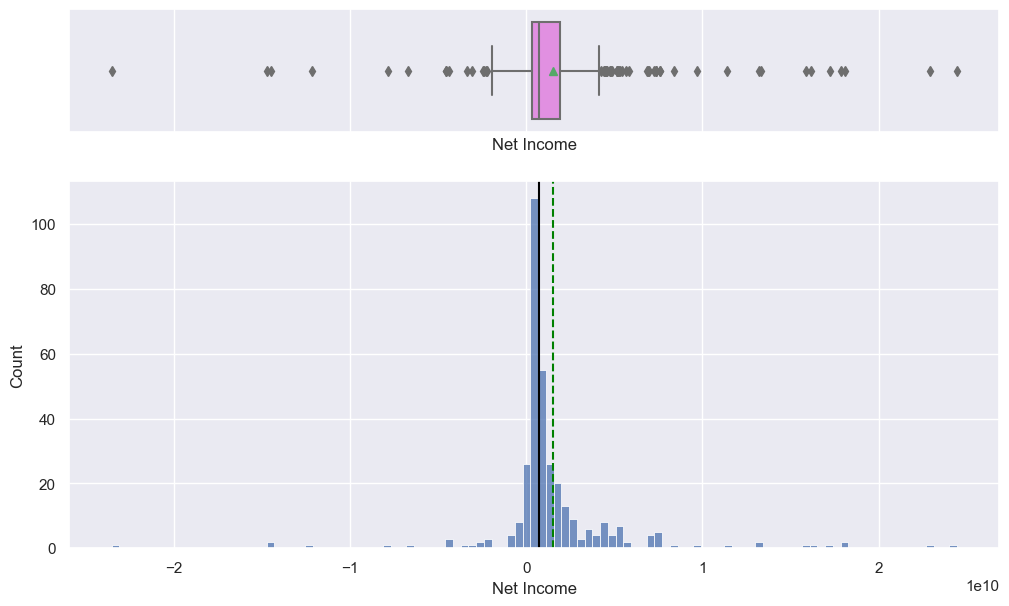

In [18]:
histogram_boxplot(df,'Net Income')  ## Complete the code to create histogram_boxplot for 'Net Income'

**`Earnings Per Share`**

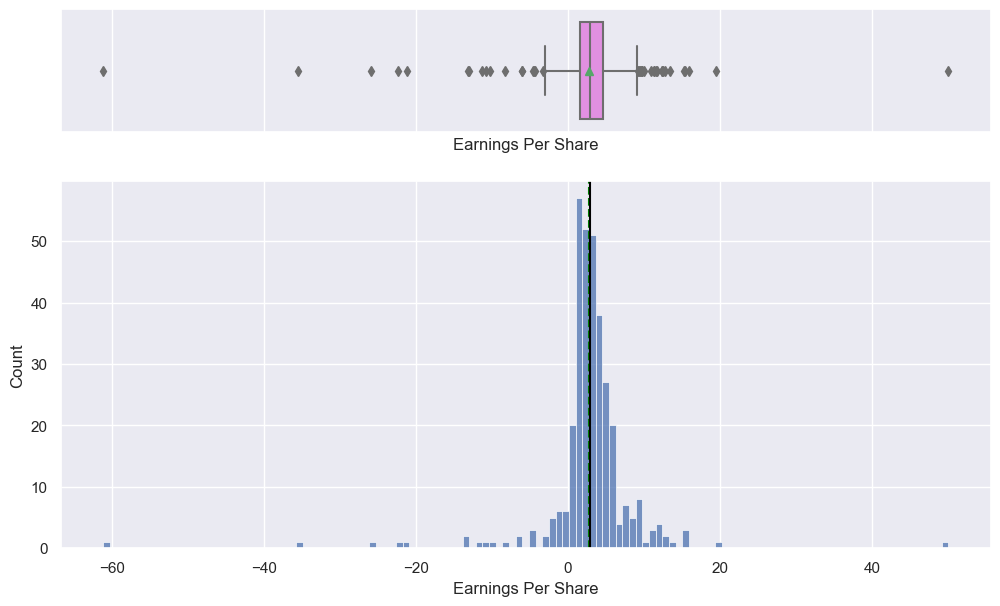

In [19]:
histogram_boxplot(df,'Earnings Per Share')  ## Complete the code to create histogram_boxplot for 'Earnings Per Share'

**`Estimated Shares Outstanding`**

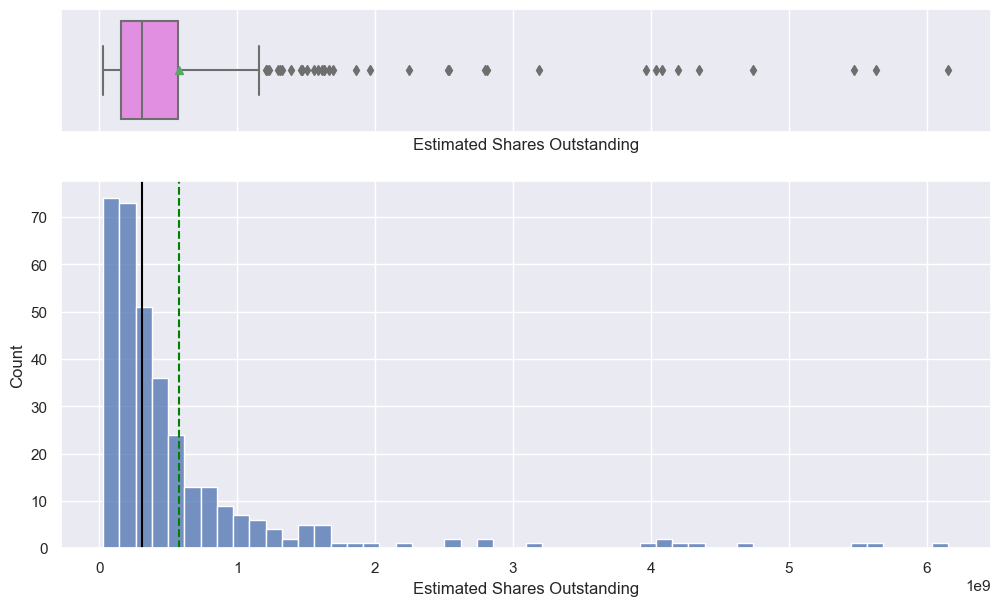

In [20]:
histogram_boxplot(df,'Estimated Shares Outstanding')  ## Complete the code to create histogram_boxplot for 'Estimated Shares Outstanding'

**`P/E Ratio`**

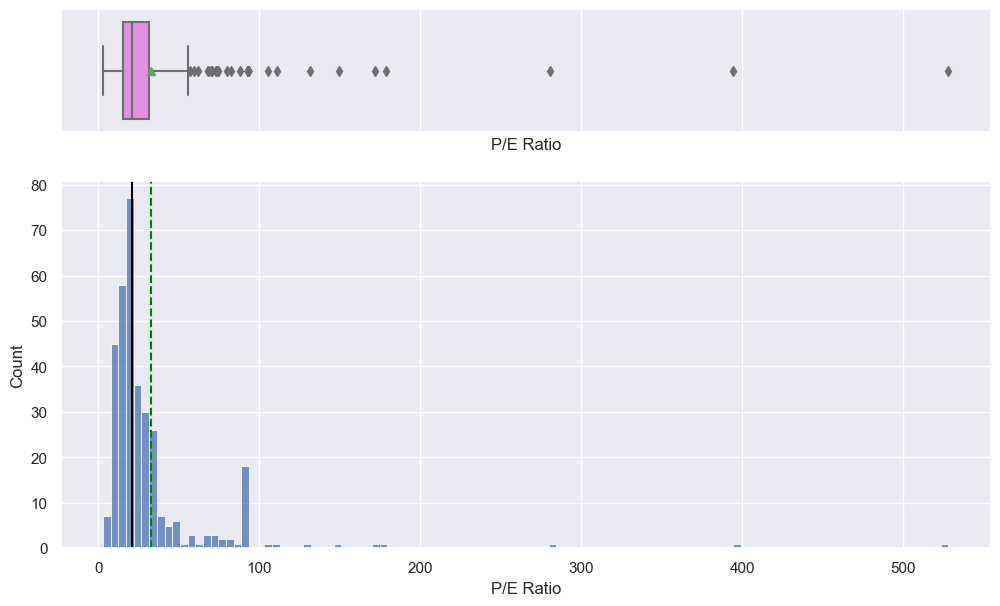

In [21]:
histogram_boxplot(df,'P/E Ratio')  ## Complete the code to create histogram_boxplot for 'P/E Ratio'

**`P/B Ratio`**

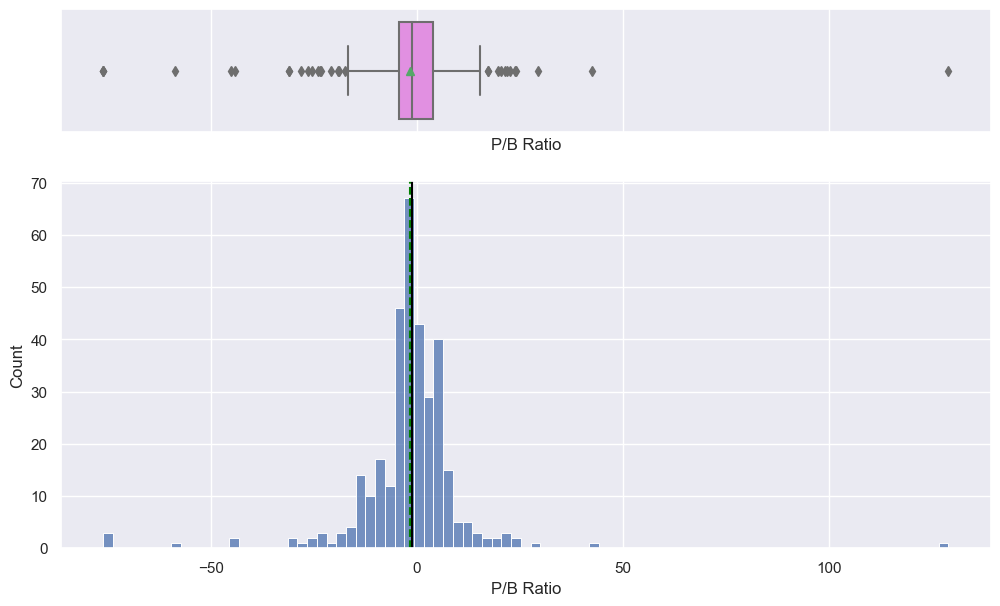

In [22]:
histogram_boxplot(df,'P/B Ratio')  ## Complete the code to create histogram_boxplot for 'P/B Ratio'

In [23]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

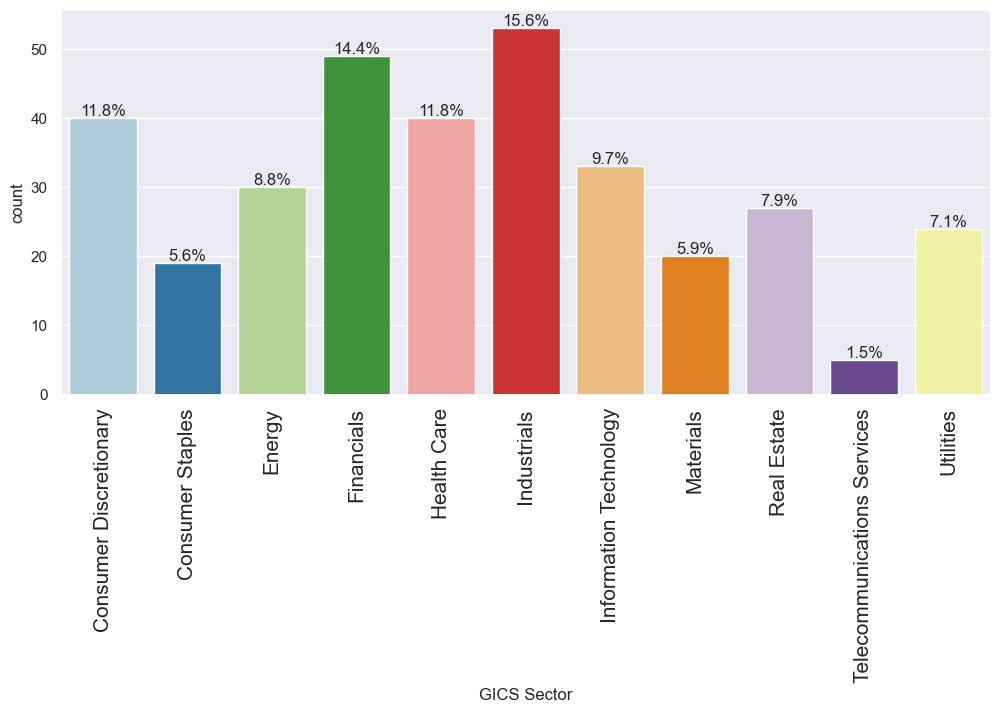

In [24]:
labeled_barplot(df, 'GICS Sector', perc=True)

* The dataset consists of 11 economy sectors, with Industrials, Health Care, and Financials emerging as the most prominent sectors in the market. These sectors enjoy high popularity and presence among investors and market participants.

**`GICS Sub Industry`**

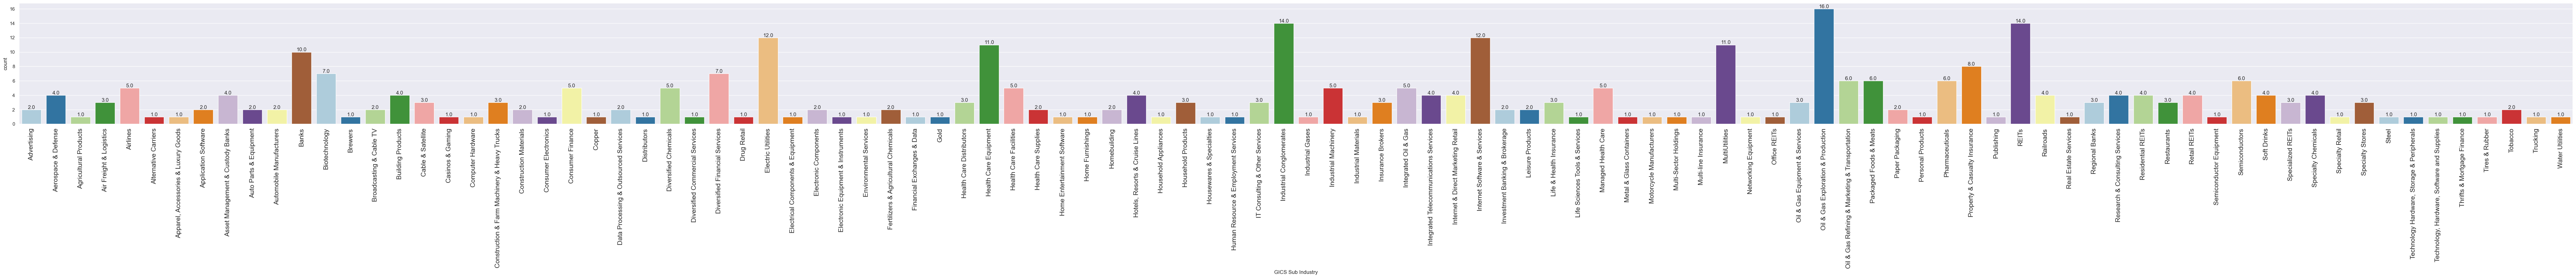

In [25]:
labeled_barplot(df,'GICS Sub Industry') 

In [26]:
df['GICS Sub Industry'].value_counts().head(n=5)


Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Internet Software & Services          12
Name: GICS Sub Industry, dtype: int64

* The top five most popular GICS sub-industries are Oil & Gas Exploration & Production, REITs, Industrial Conglomerates, Electric Utilities, and Internet Software & Services. 

### Bivariate Analysis

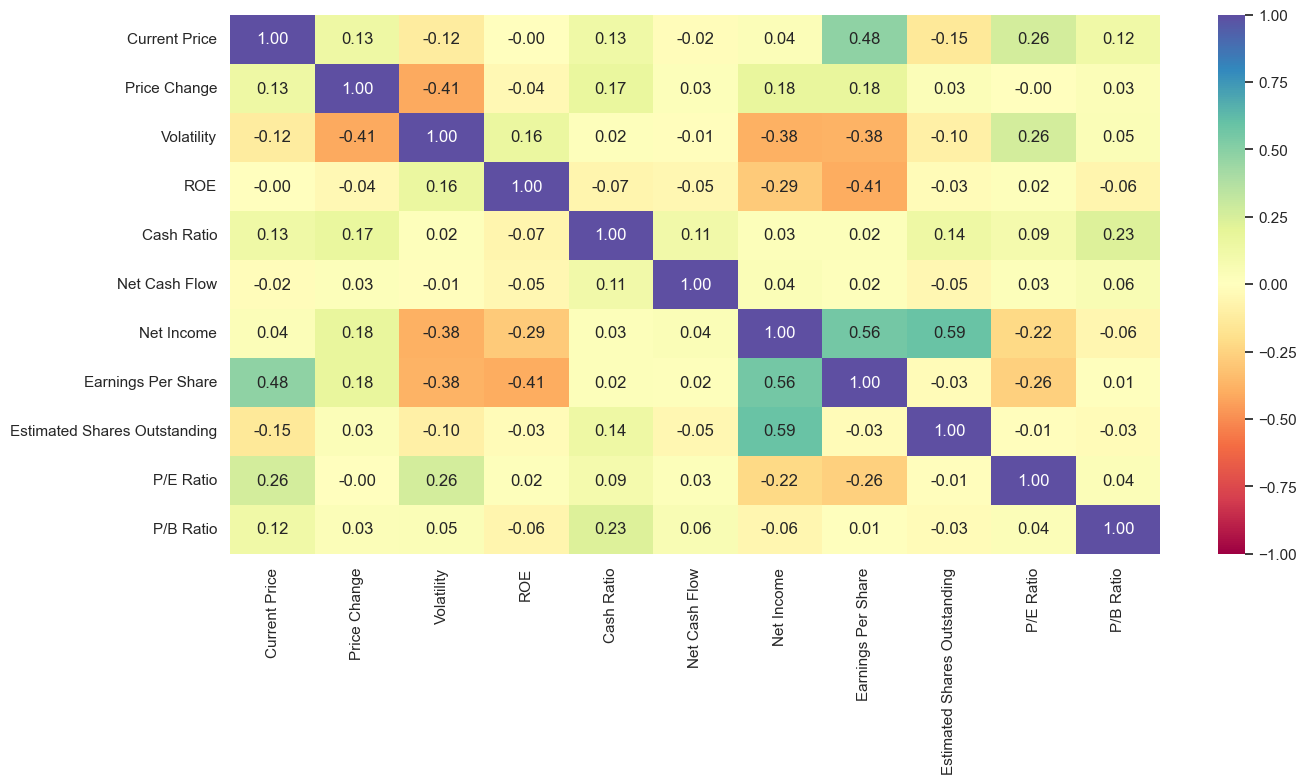

In [27]:
# correlation check
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Several variables exhibit moderate correlations (+/- .40) with each other.
- Volatility shows a negative correlation with price change, indicating that as a stock becomes more volatile, its price tends to decline. Net income demonstrates a negative correlation with volatility, meaning that as a company generates higher net income, its price tends to be less volatile. 
- Net income also shows a positive correlation with earnings per share (EPS) and estimated shares outstanding. 
- EPS, in turn, displays a positive correlation with current price, implying that as a company's EPS increases, its price is also likely to rise. However, EPS exhibits a negative correlation with return on equity (ROE), suggesting that as a company generates more equity for shareholders and an equivalent amount of net income in subsequent periods, the return on equity is likely to decrease.

#### The stocks of which economic sector have seen the maximum price increase on average? 

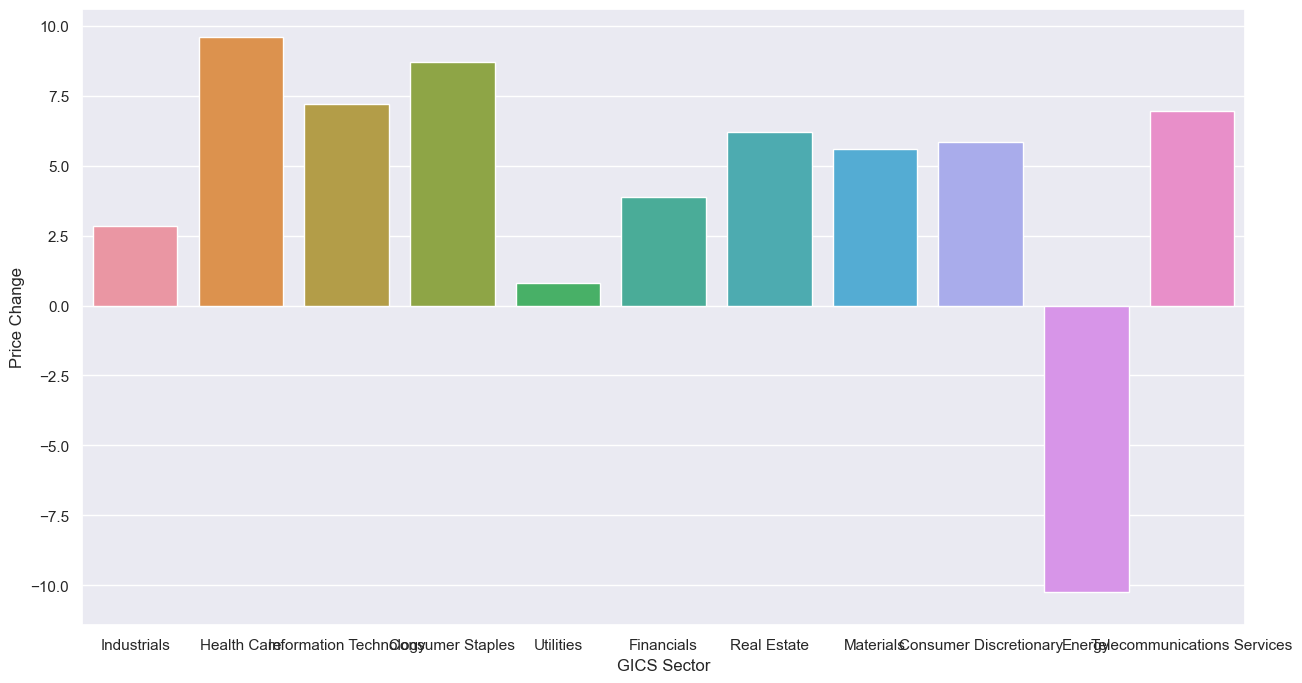

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  
plt.show()

* During the preceding period, stocks in the health care sector have demonstrated the highest average price increase.

#### How does the average cash ratio vary across economic sectors?

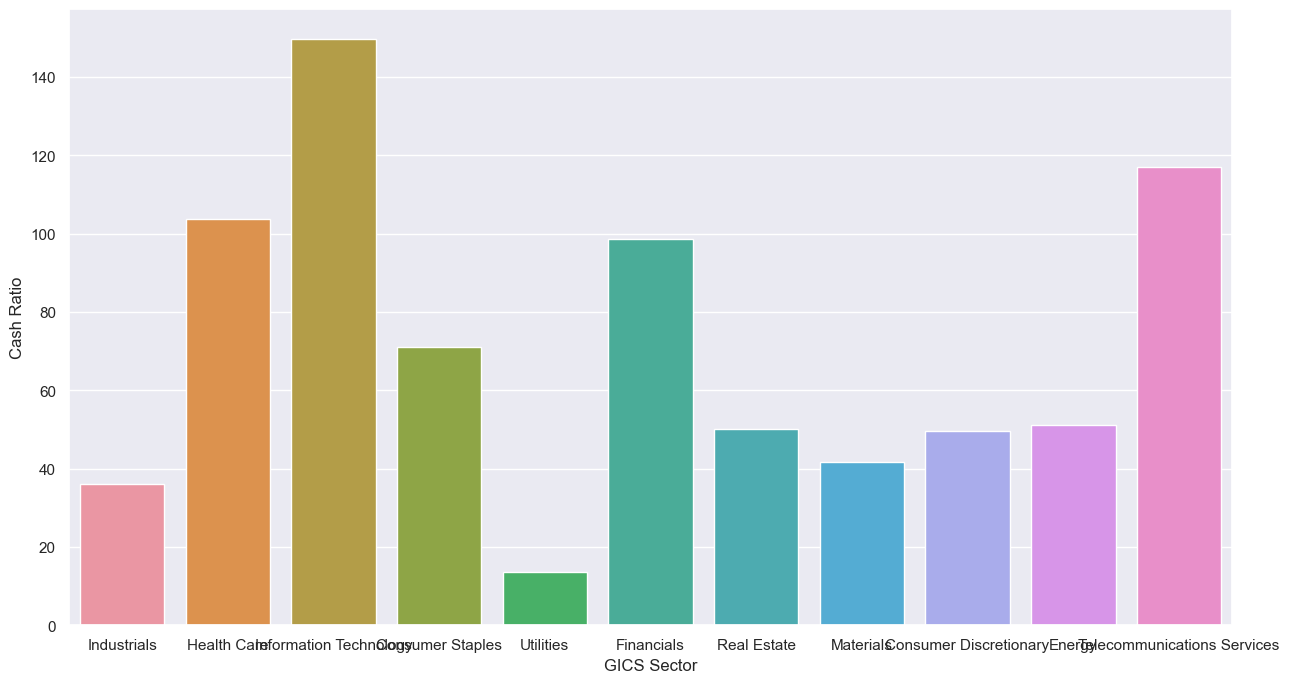

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  
plt.show()

In [30]:
df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)


GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

* The sectors of Information Technology, Telecommunications Services, and Health Care exhibit the highest cash ratios, indicating a strong preservation of cash within these industries. Conversely, traditional sectors such as Utilities and Industrials have the lowest cash ratios, suggesting relatively lower levels of cash preservation in comparison.


#### How does the P/E ratio vary, on average, across economic sectors?

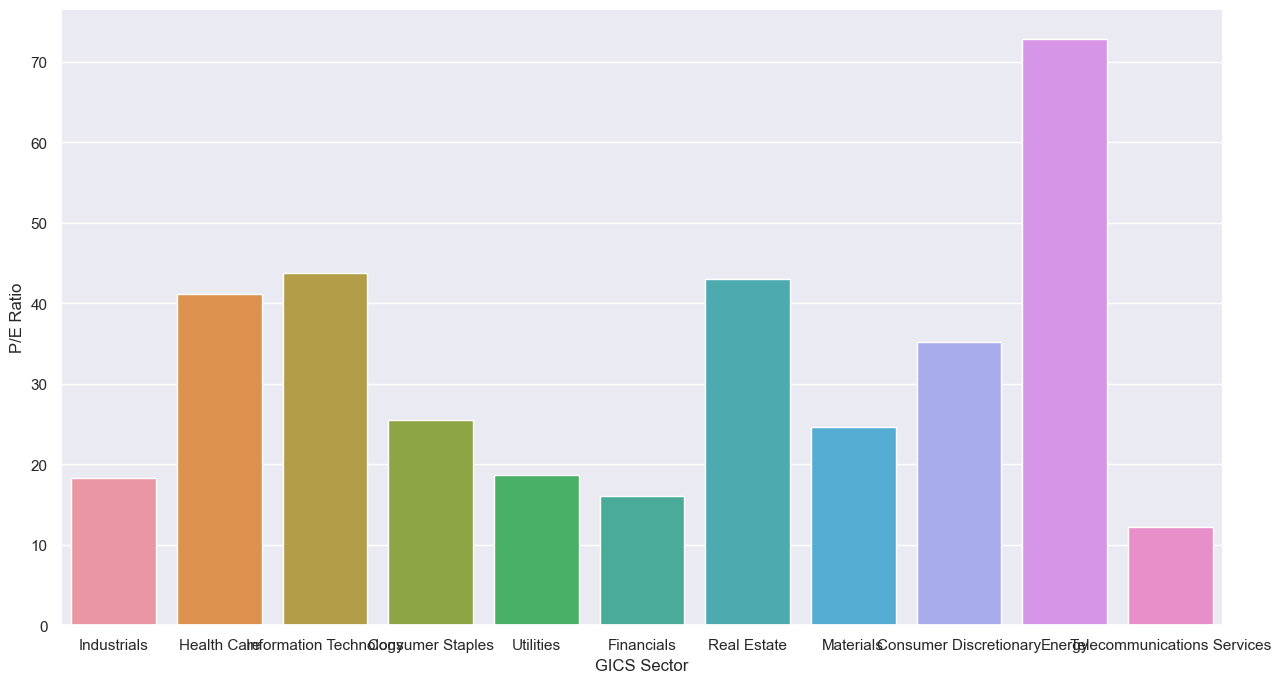

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  
plt.show()

In [32]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)



GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

* The Energy Sector exhibits the highest P/E ratio, indicating that investors have high expectations for future earnings growth in this sector. On the other hand, Telecommunications Services has a relatively low P/E ratio, suggesting that the market has lower expectations for the stocks within this sector.

## Data Preprocessing



#### Outliner check 

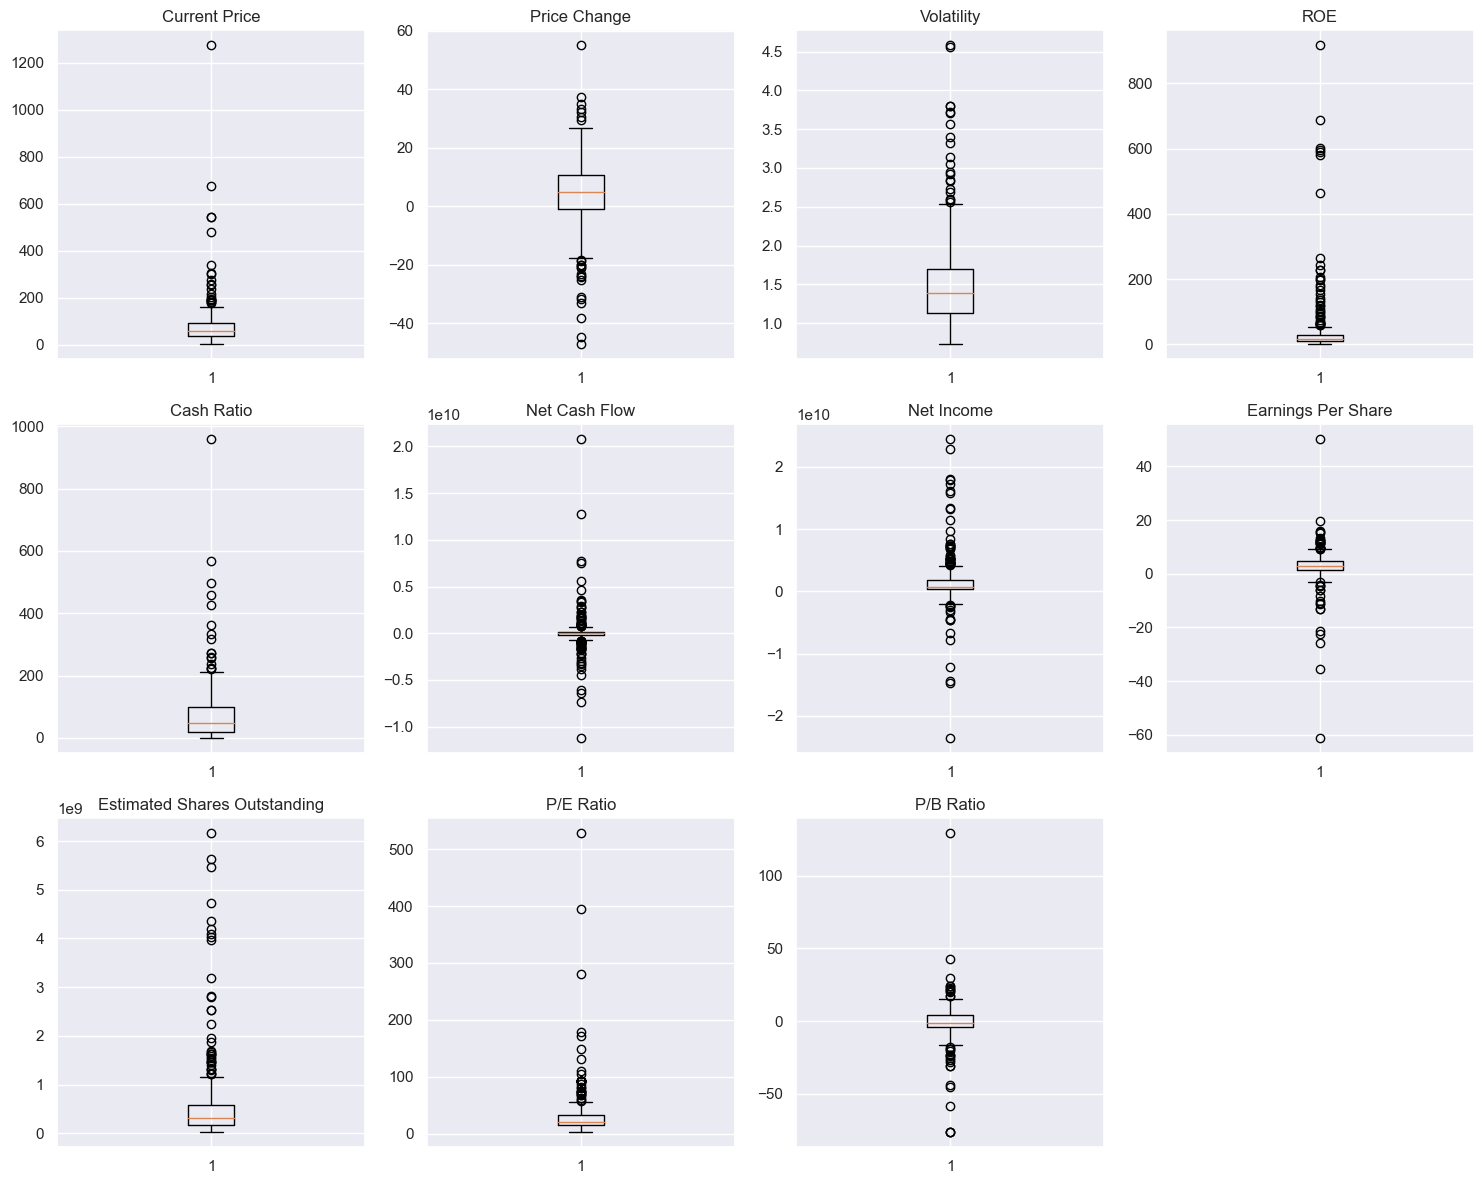

In [33]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are outliers in the data.
- However, we will not treat them as they are proper values.

### Scaling

- Let's scale the data before we proceed with clustering.


In [34]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Ticker Symbol", "Security","GICS Sector","GICS Sub Industry"], axis=1)),
    columns=df.drop(["Ticker Symbol", "Security","GICS Sector","GICS Sub Industry"], axis=1).columns,
)
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-means Clustering

### Checking Elbow Plot

In [35]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.176396791566185
Number of Clusters: 5 	Average Distortion: 2.1149905940572853
Number of Clusters: 6 	Average Distortion: 2.0826085773732
Number of Clusters: 7 	Average Distortion: 2.0185279265966143
Number of Clusters: 8 	Average Distortion: 1.9901866412356706


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

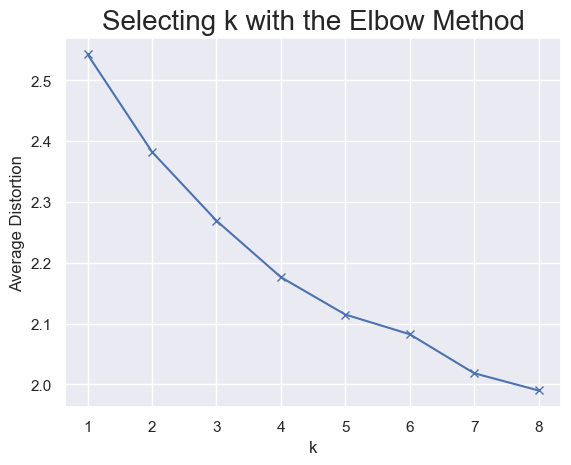

In [36]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- The appropriate value of K from the elbow curve seems to be 4 or 5

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


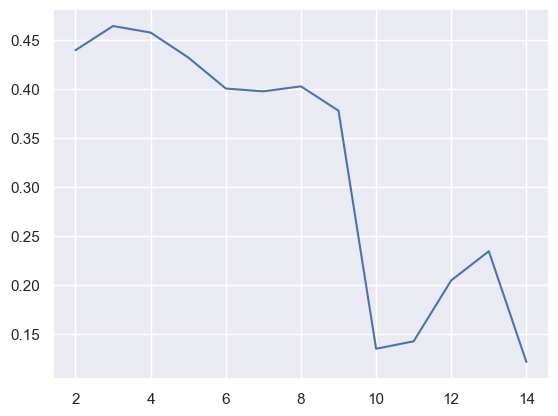

In [37]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

- From the silhouette score, it seems that 7 is a good value of K

### Selecting final model

**Let's take 5 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 5 in the elbow curve.**

In [38]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=1)

In [39]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

## Cluster Profiling

In [40]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [41]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  
)

In [42]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,65.174668,-11.542247,2.690220,37.300000,65.366667,195008366.666667,-1677736033.333333,-4.401667,544473664.718000,113.488924,1.424161,30
1,72.738269,5.179897,1.380738,34.825455,53.138182,-10147287.272727,1488641570.909091,3.636164,437961614.918582,23.680917,-3.395254,275
2,233.251108,13.682869,1.719008,29.333333,296.523810,1398716380.952381,1835686380.952381,7.126190,508721791.962857,37.805996,16.758218,21
3,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
4,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3


In [43]:
##print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [44]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          1
             Energy                         21
             Health Care                     1
             Industrials                     1
             Information Technology          4
             Materials                       2
1            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
2            Consumer Discretionary          5
             Consumer Staples                1
             Financials                      1
             Health

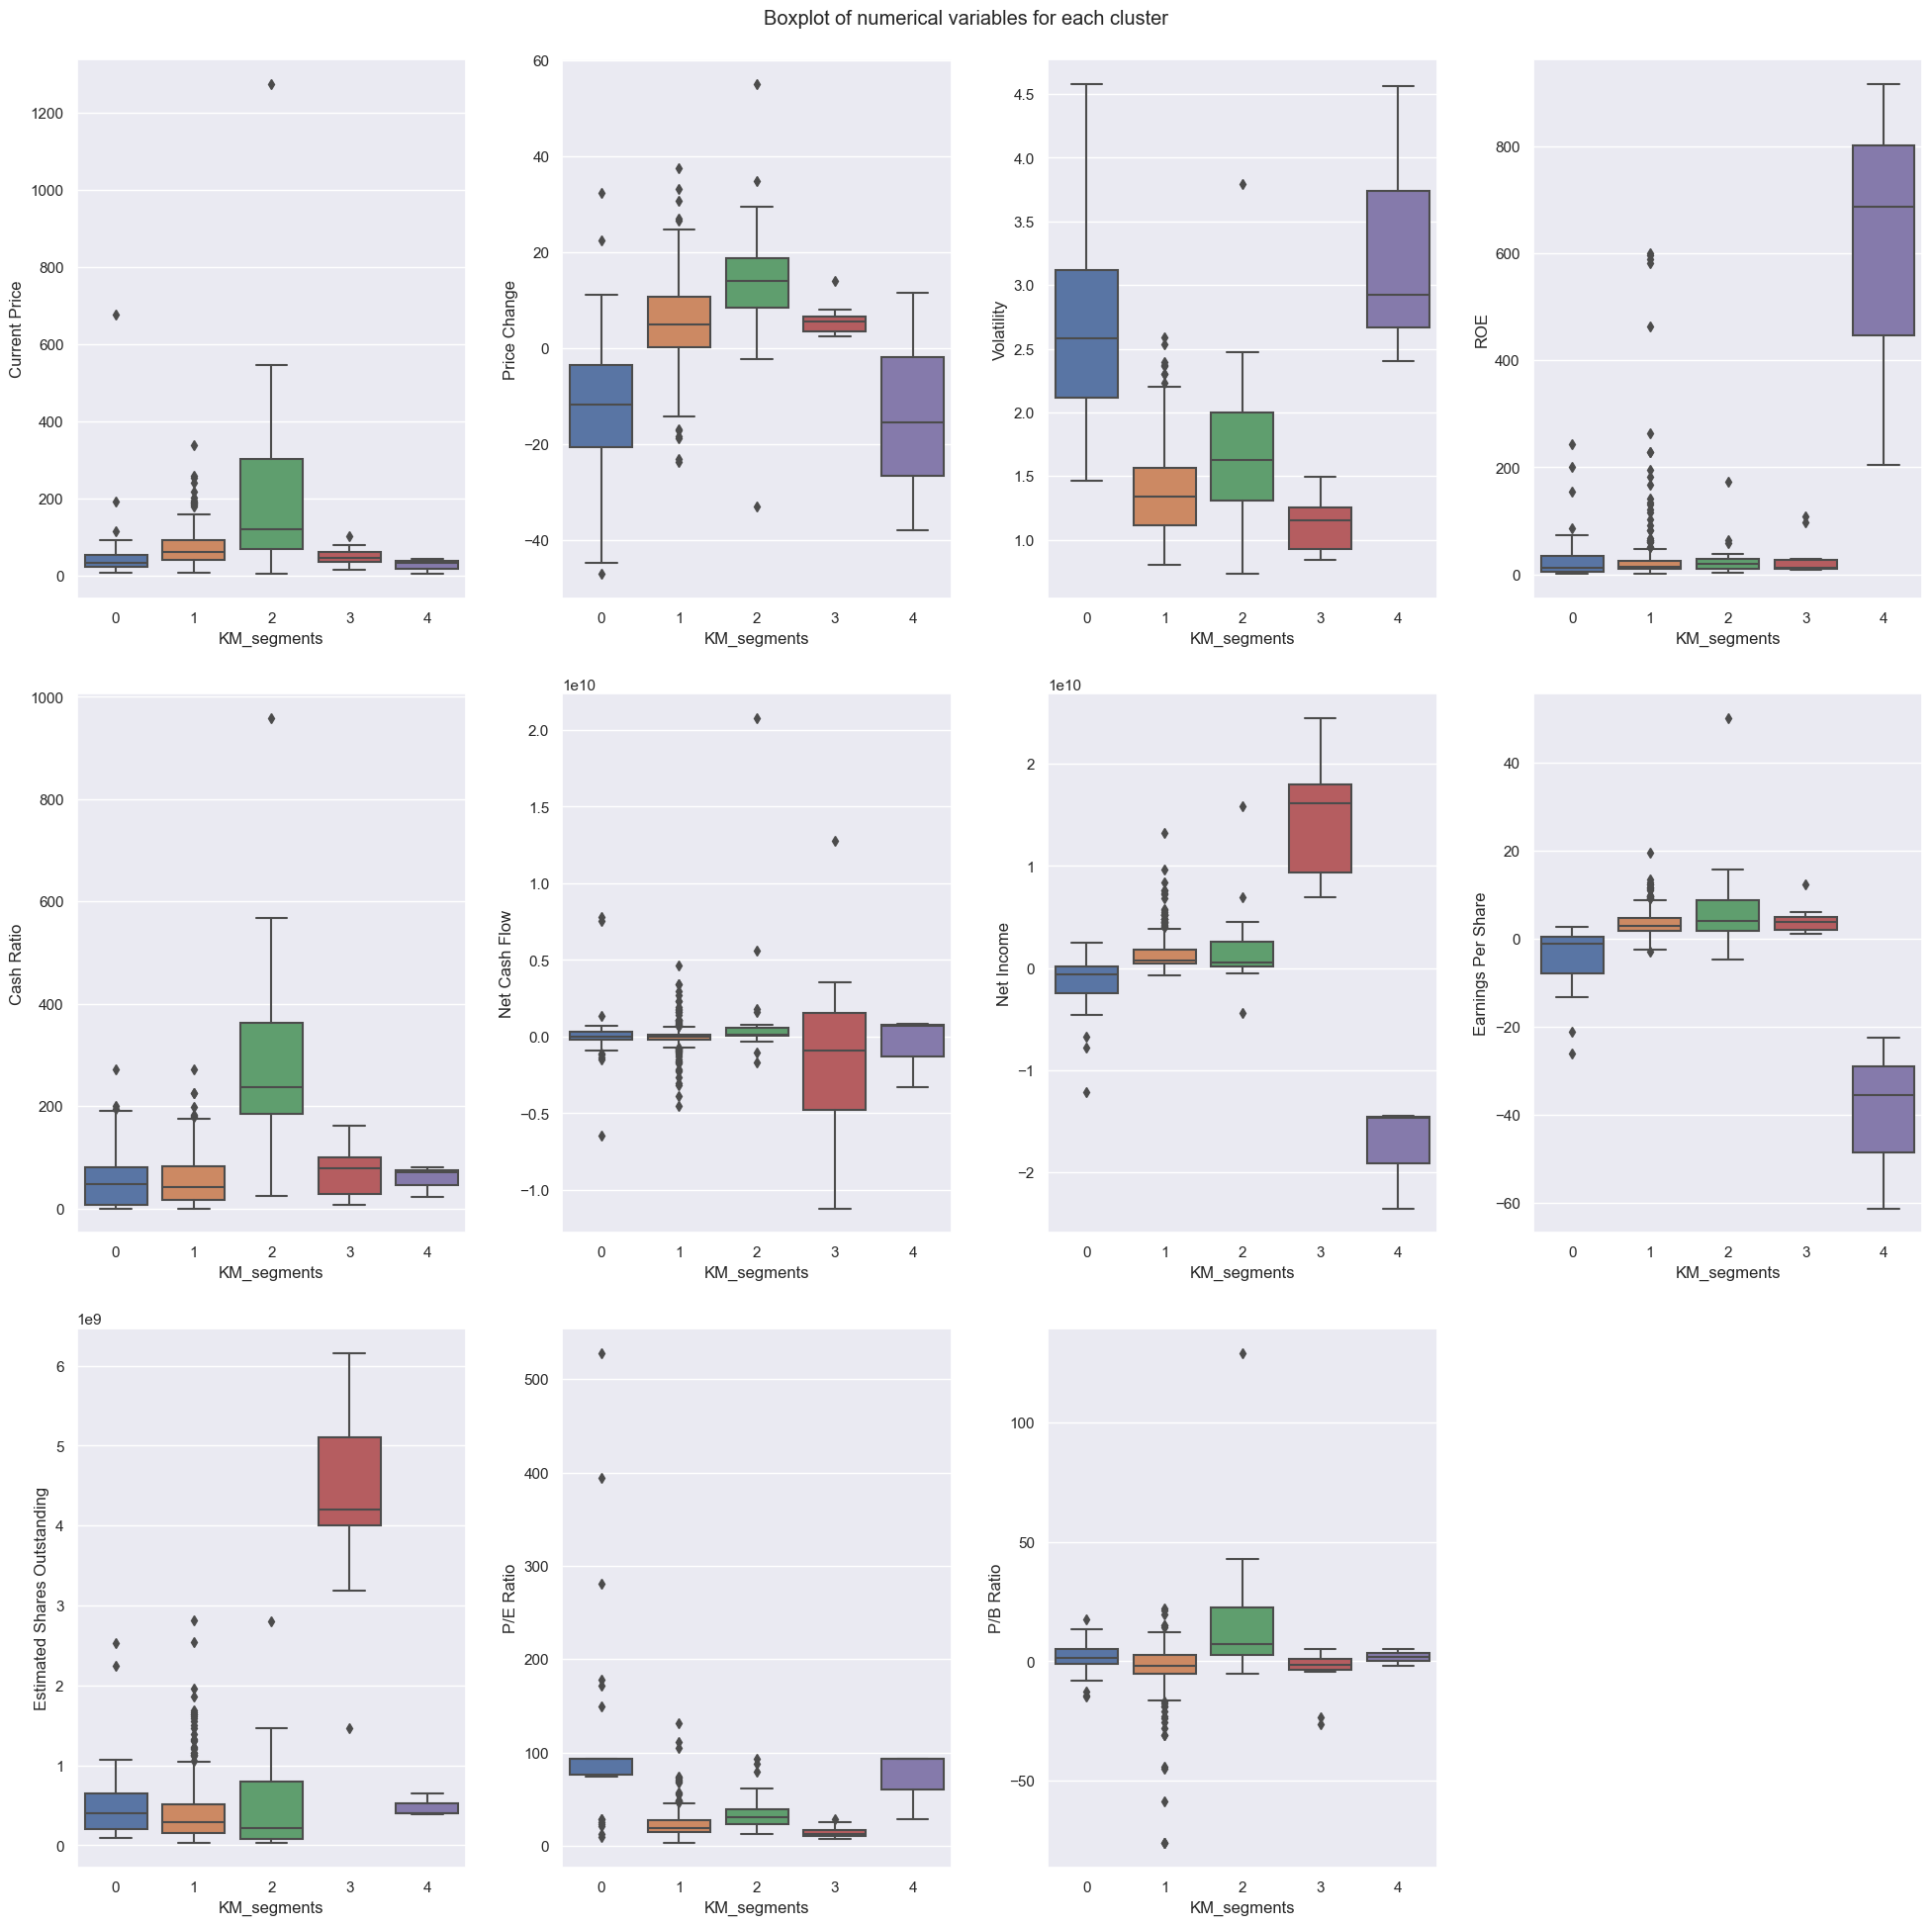

In [45]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - Current Price, Price Change, ROE, Cash Ratio, Net Income, Earning per share are low
    - P/E Ratio, Volaility are high
    - P/B Ratio, Net Cash flow are average    
Overall, a combination of low financial performance indicators (current price, price change, ROE, cash ratio, net income, EPS) and high valuation indicators (P/E ratio, volatility) suggests that the stock may be considered as underperforming or potentially overvalued in the market




- **Cluster 1**:
    - Volaility are high
    - Net Income are low 
    - Current Price, Price Change, ROE, Cash Ratio, Net Cash flow, Earning per share, Estimateed Shares Outstanding, P/E Ratio and P/B Ratio are average   
In summary, a combination of high volatility, low net income, and average values for other financial metrics suggests that the stock may be considered as a higher-risk investment option with weaker profitability but with a valuation in line with its industry peers. 


- **Cluster 2**:
    - Current Price, Price Change, Cash Ratio, Net Cash Flow, Net Income, Earning per share are high
    - Estimateed Shares Outstanding, P/E ratio are low 
    - Volatility, ROE, P/B are average   
A combination of high current price, price change, cash ratio, net cash flow, net income, and EPS, along with low estimated shares outstanding and P/E ratio, and average volatility, ROE, and P/B ratio suggests that the stock may be considered as a strong performer with positive financial indicators 



- **Cluster 3**:
    - Price change, Cash Ratio, Net income, EPS, Estimateed Shares Outstanding are high
    - Volatility, Net Cash Flow, P/E ratio are low 
    - Current Price, ROE, P/B ratio are average   
Based on a combination of factors, including significant price change, a strong cash ratio, high net income, EPS, and estimated shares outstanding, coupled with low volatility, net cash flow, and P/E ratio, as well as average current price, ROE, and P/B ratio, the stock appears to be an appealing investment option with positive financial indicators and promising growth potential.


- **Cluster 4**:
    - Volatility, ROE, Estimateed Shares Outstanding are high
    - Current Price, Price Change, Net income, EPS, P/E ratio are low 
    - Cash Ratio, Net Cash Flow, P/B ratio average   
To summarize, the stock exhibits high volatility, return on equity (ROE), and estimated shares outstanding, while having low current price, price change, net income, earnings per share (EPS), and price-to-earnings (P/E) ratio. The stock also demonstrates average values for cash ratio, net cash flow, and price-to-book (P/B) ratio. This combination suggests that the stock may be perceived as a higher-risk investment with potentially weaker financial performance and a lower valuation.



## Hierarchical Clustering

### Checking Cophenetic Correlation

In [46]:
hc_df = subset_scaled_df.copy()

In [47]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

**Let's explore different linkage methods with Euclidean distance only.**

In [48]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

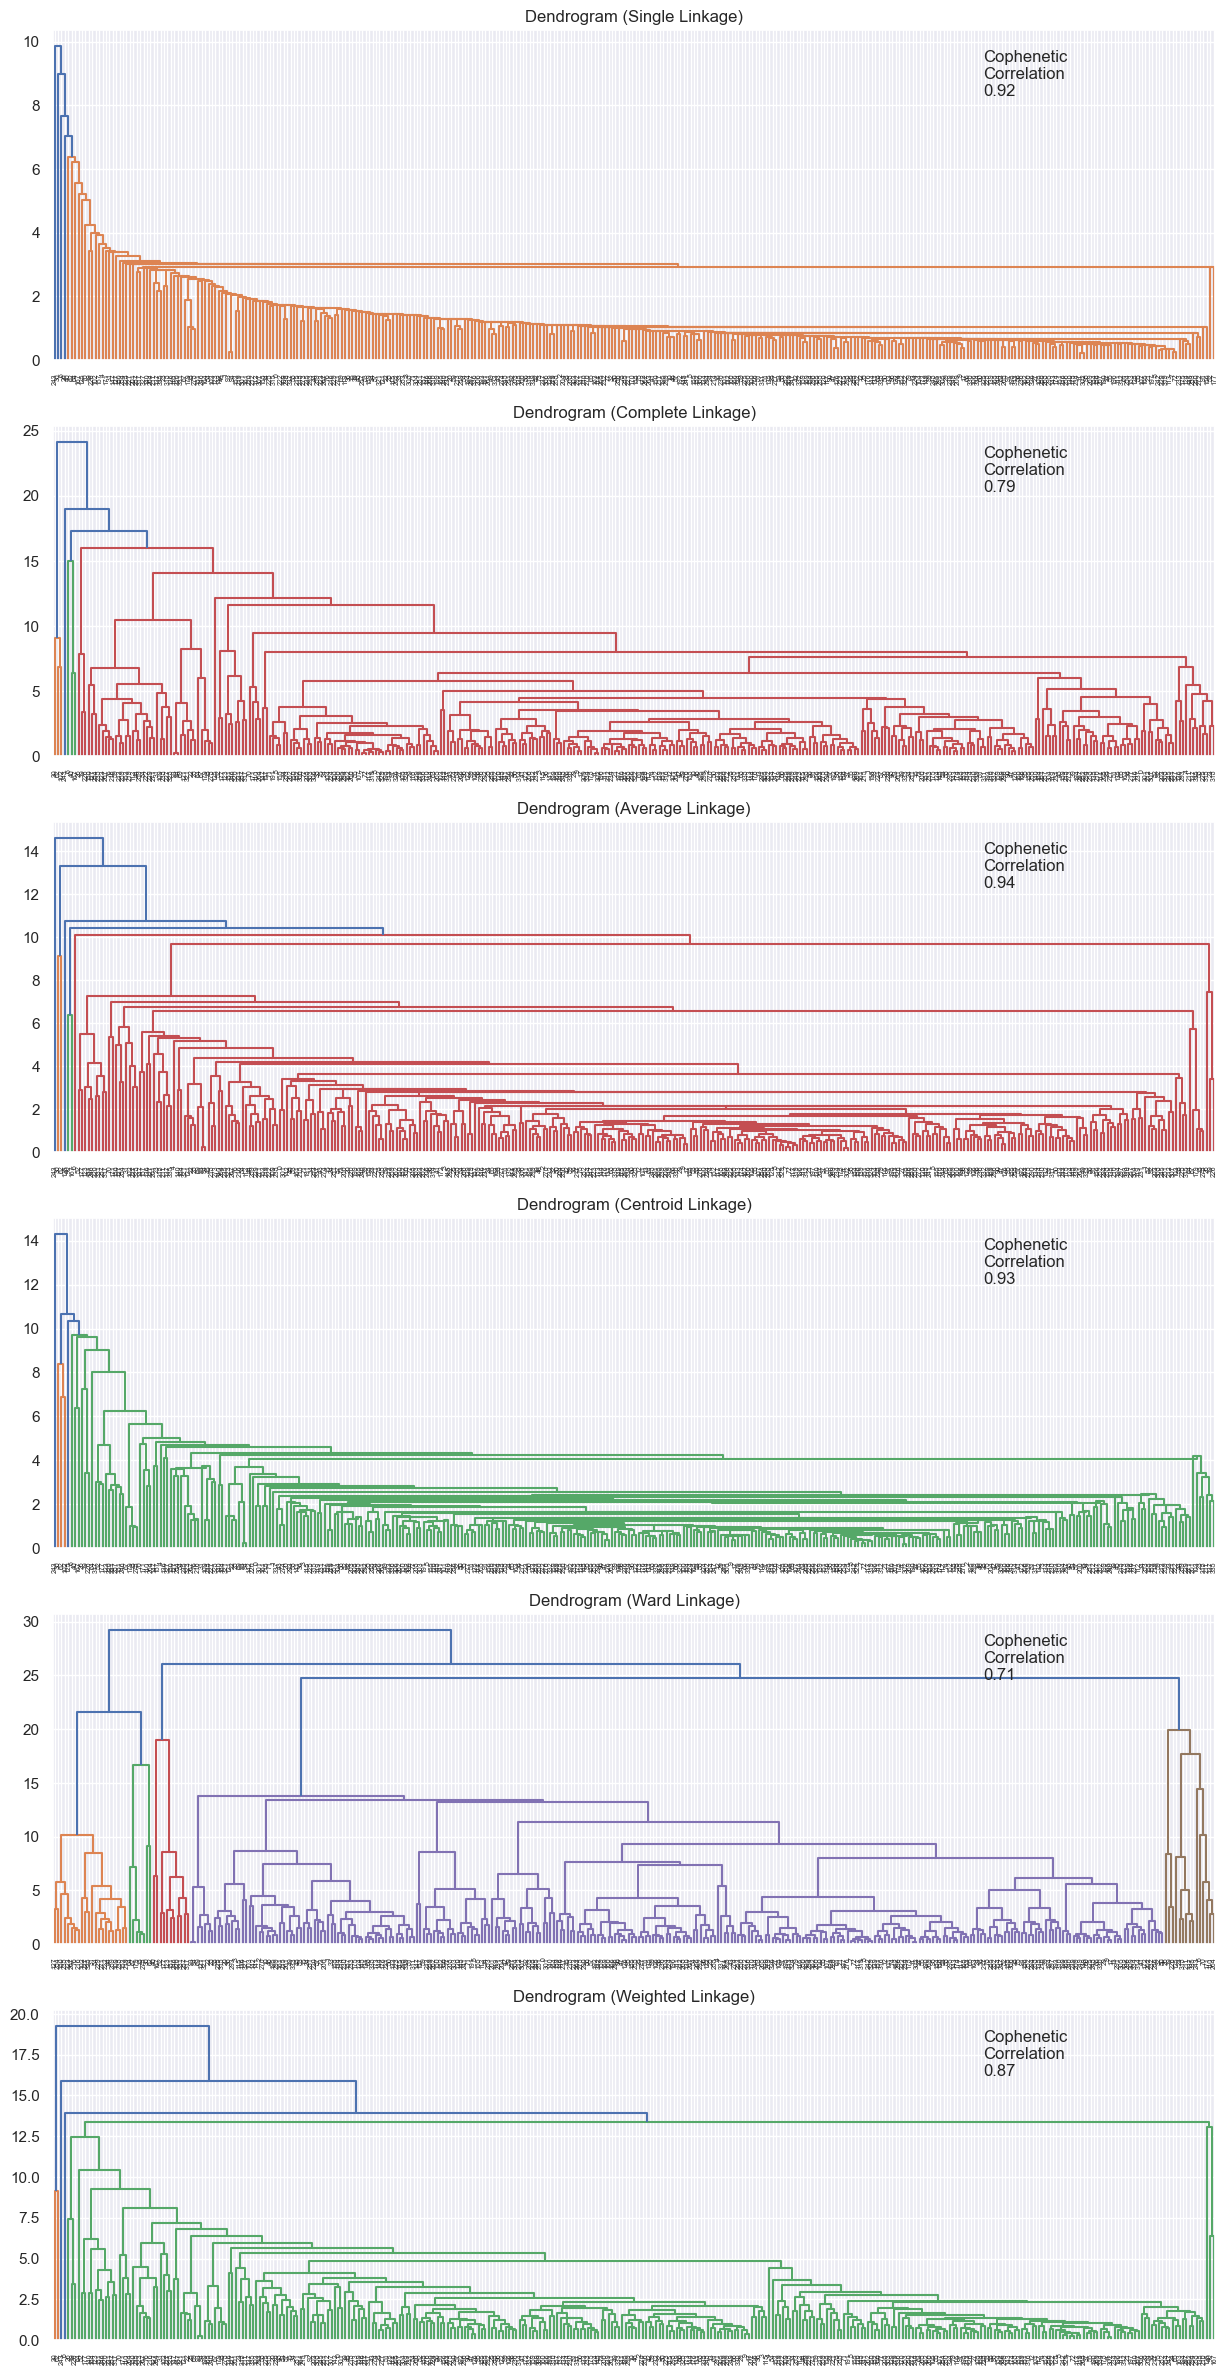

In [49]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [50]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


### Creating Model using sklearn

In [51]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [59]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [60]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [61]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  
)

In [62]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


In [63]:

# Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

In [64]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

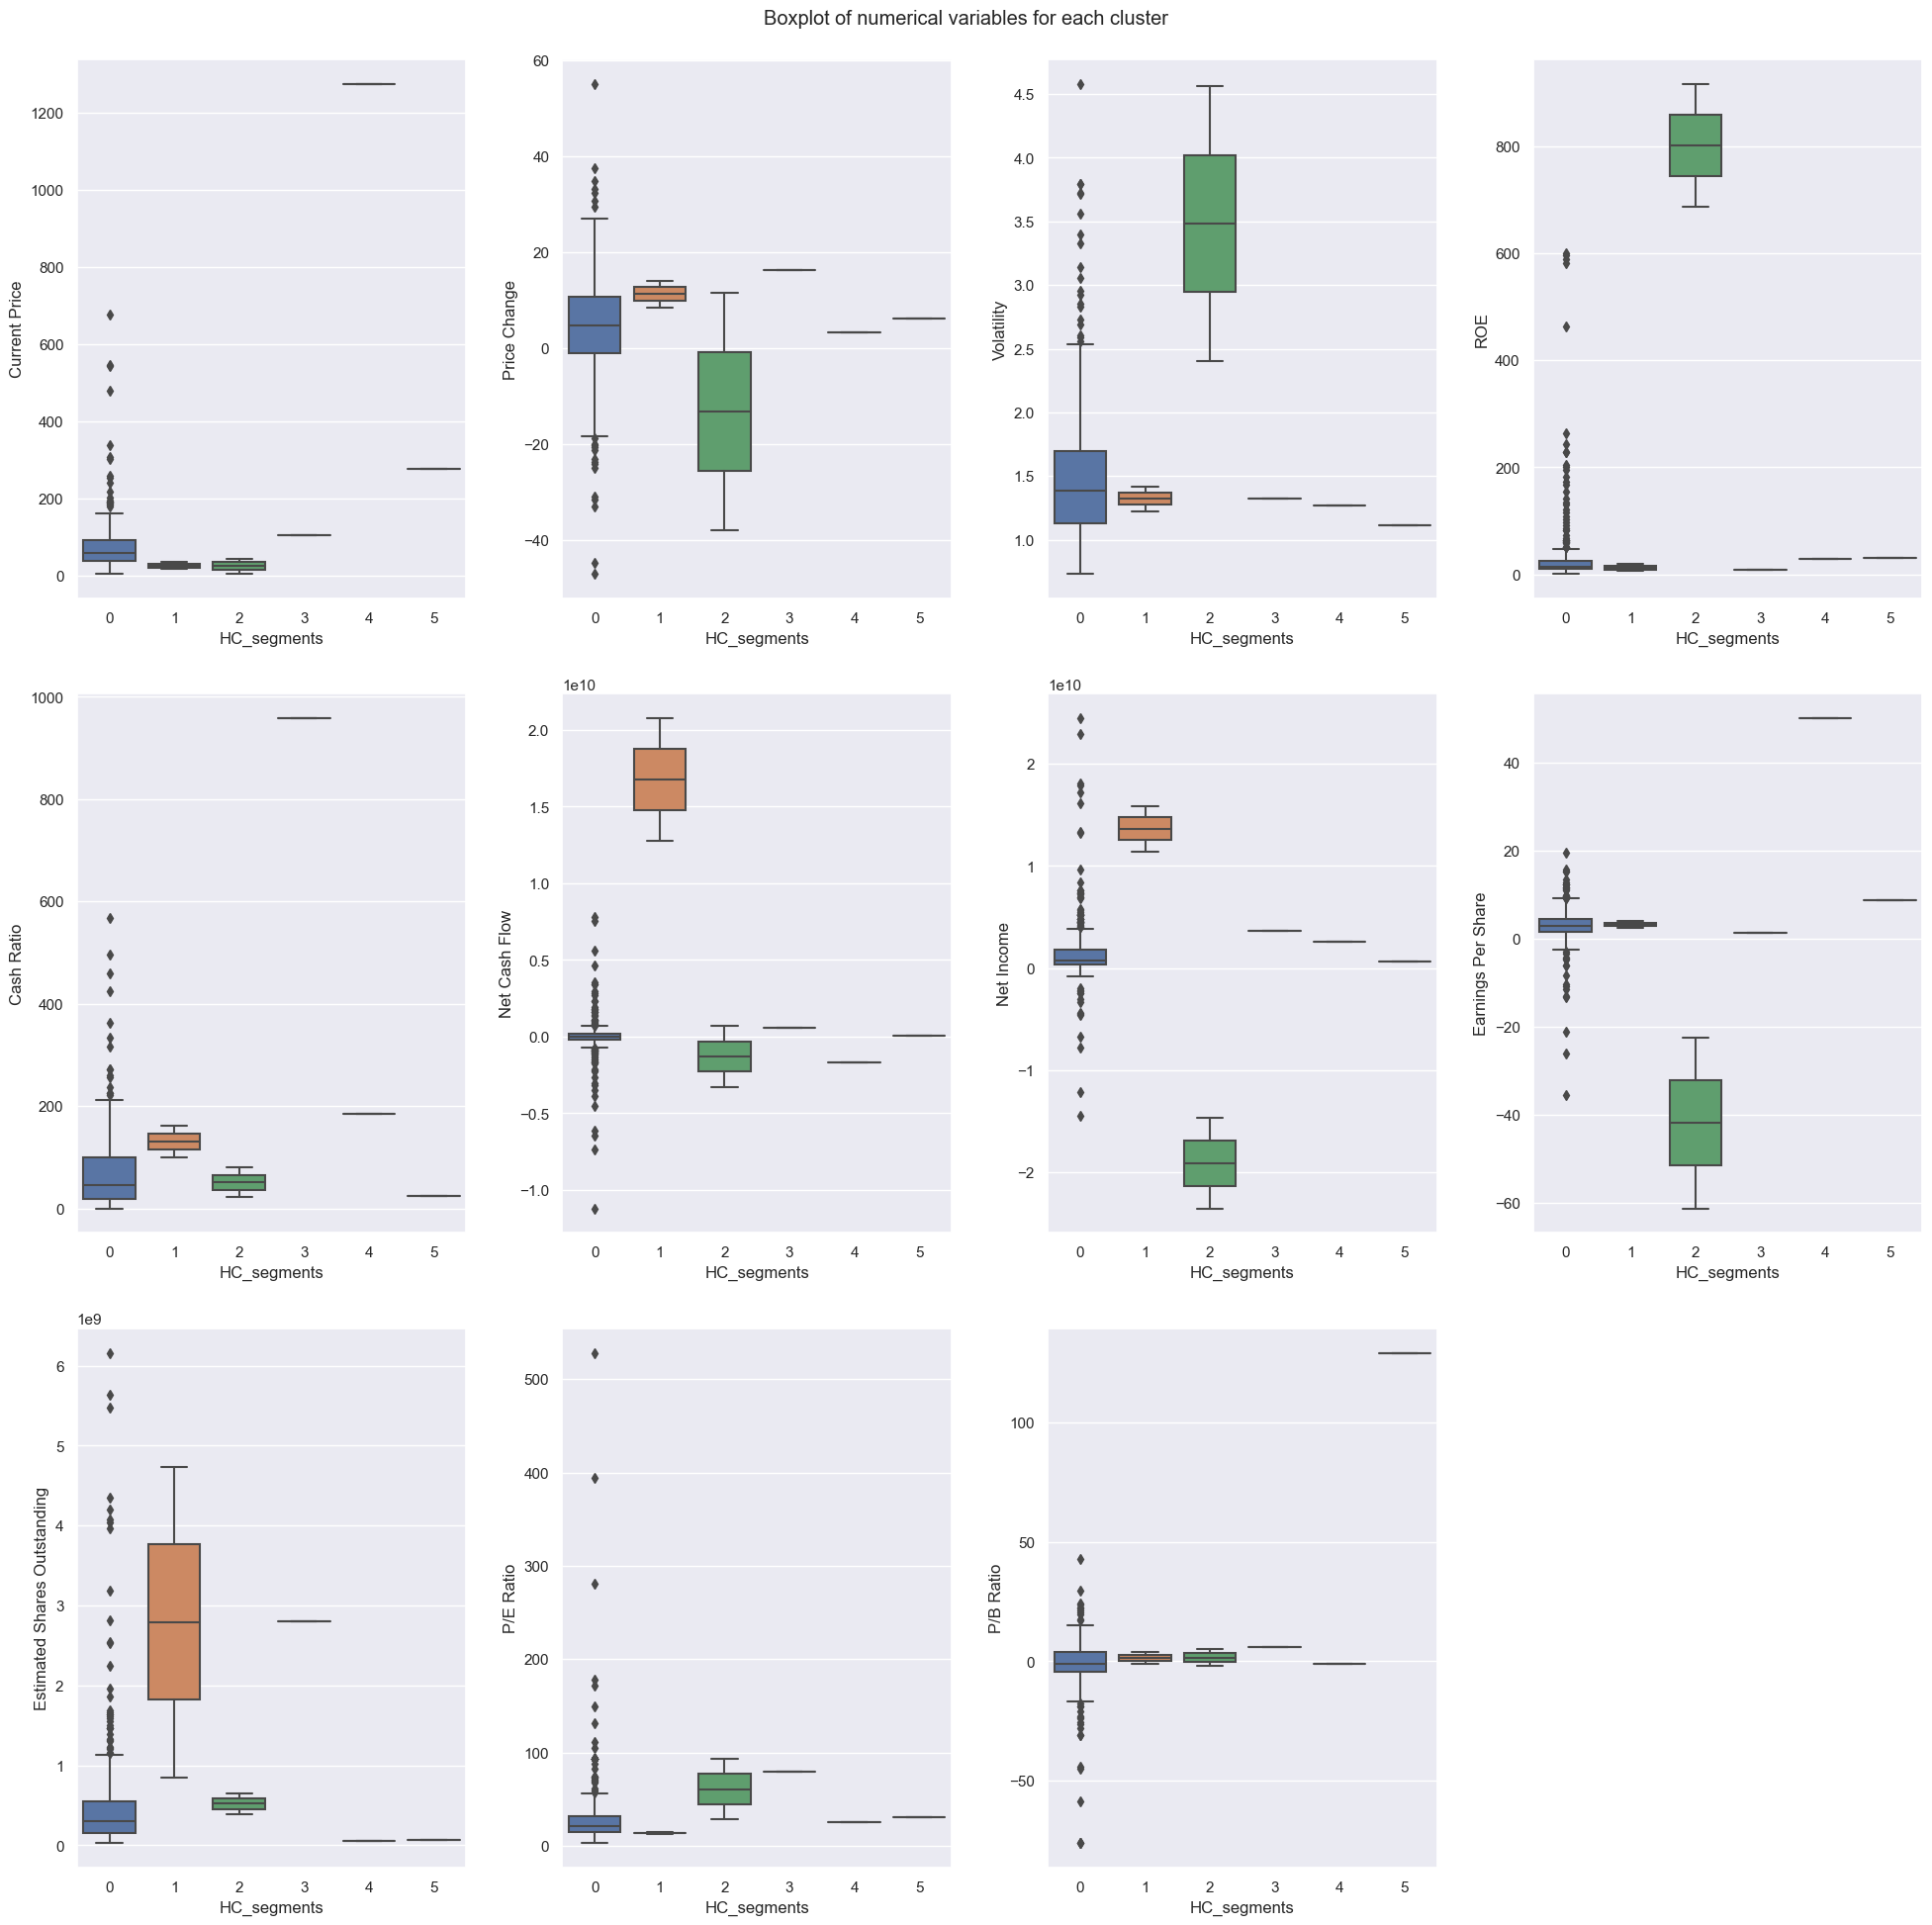

In [65]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)


**We see that there are 3 clusters of one company, 2 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

## Creating Final Model

In [66]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [67]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_


### Cluster Profiling


In [68]:
cluster_profile = df2.groupby("HC_Clusters").mean()

In [69]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [70]:
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print()
    
    
    

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [71]:
df2.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

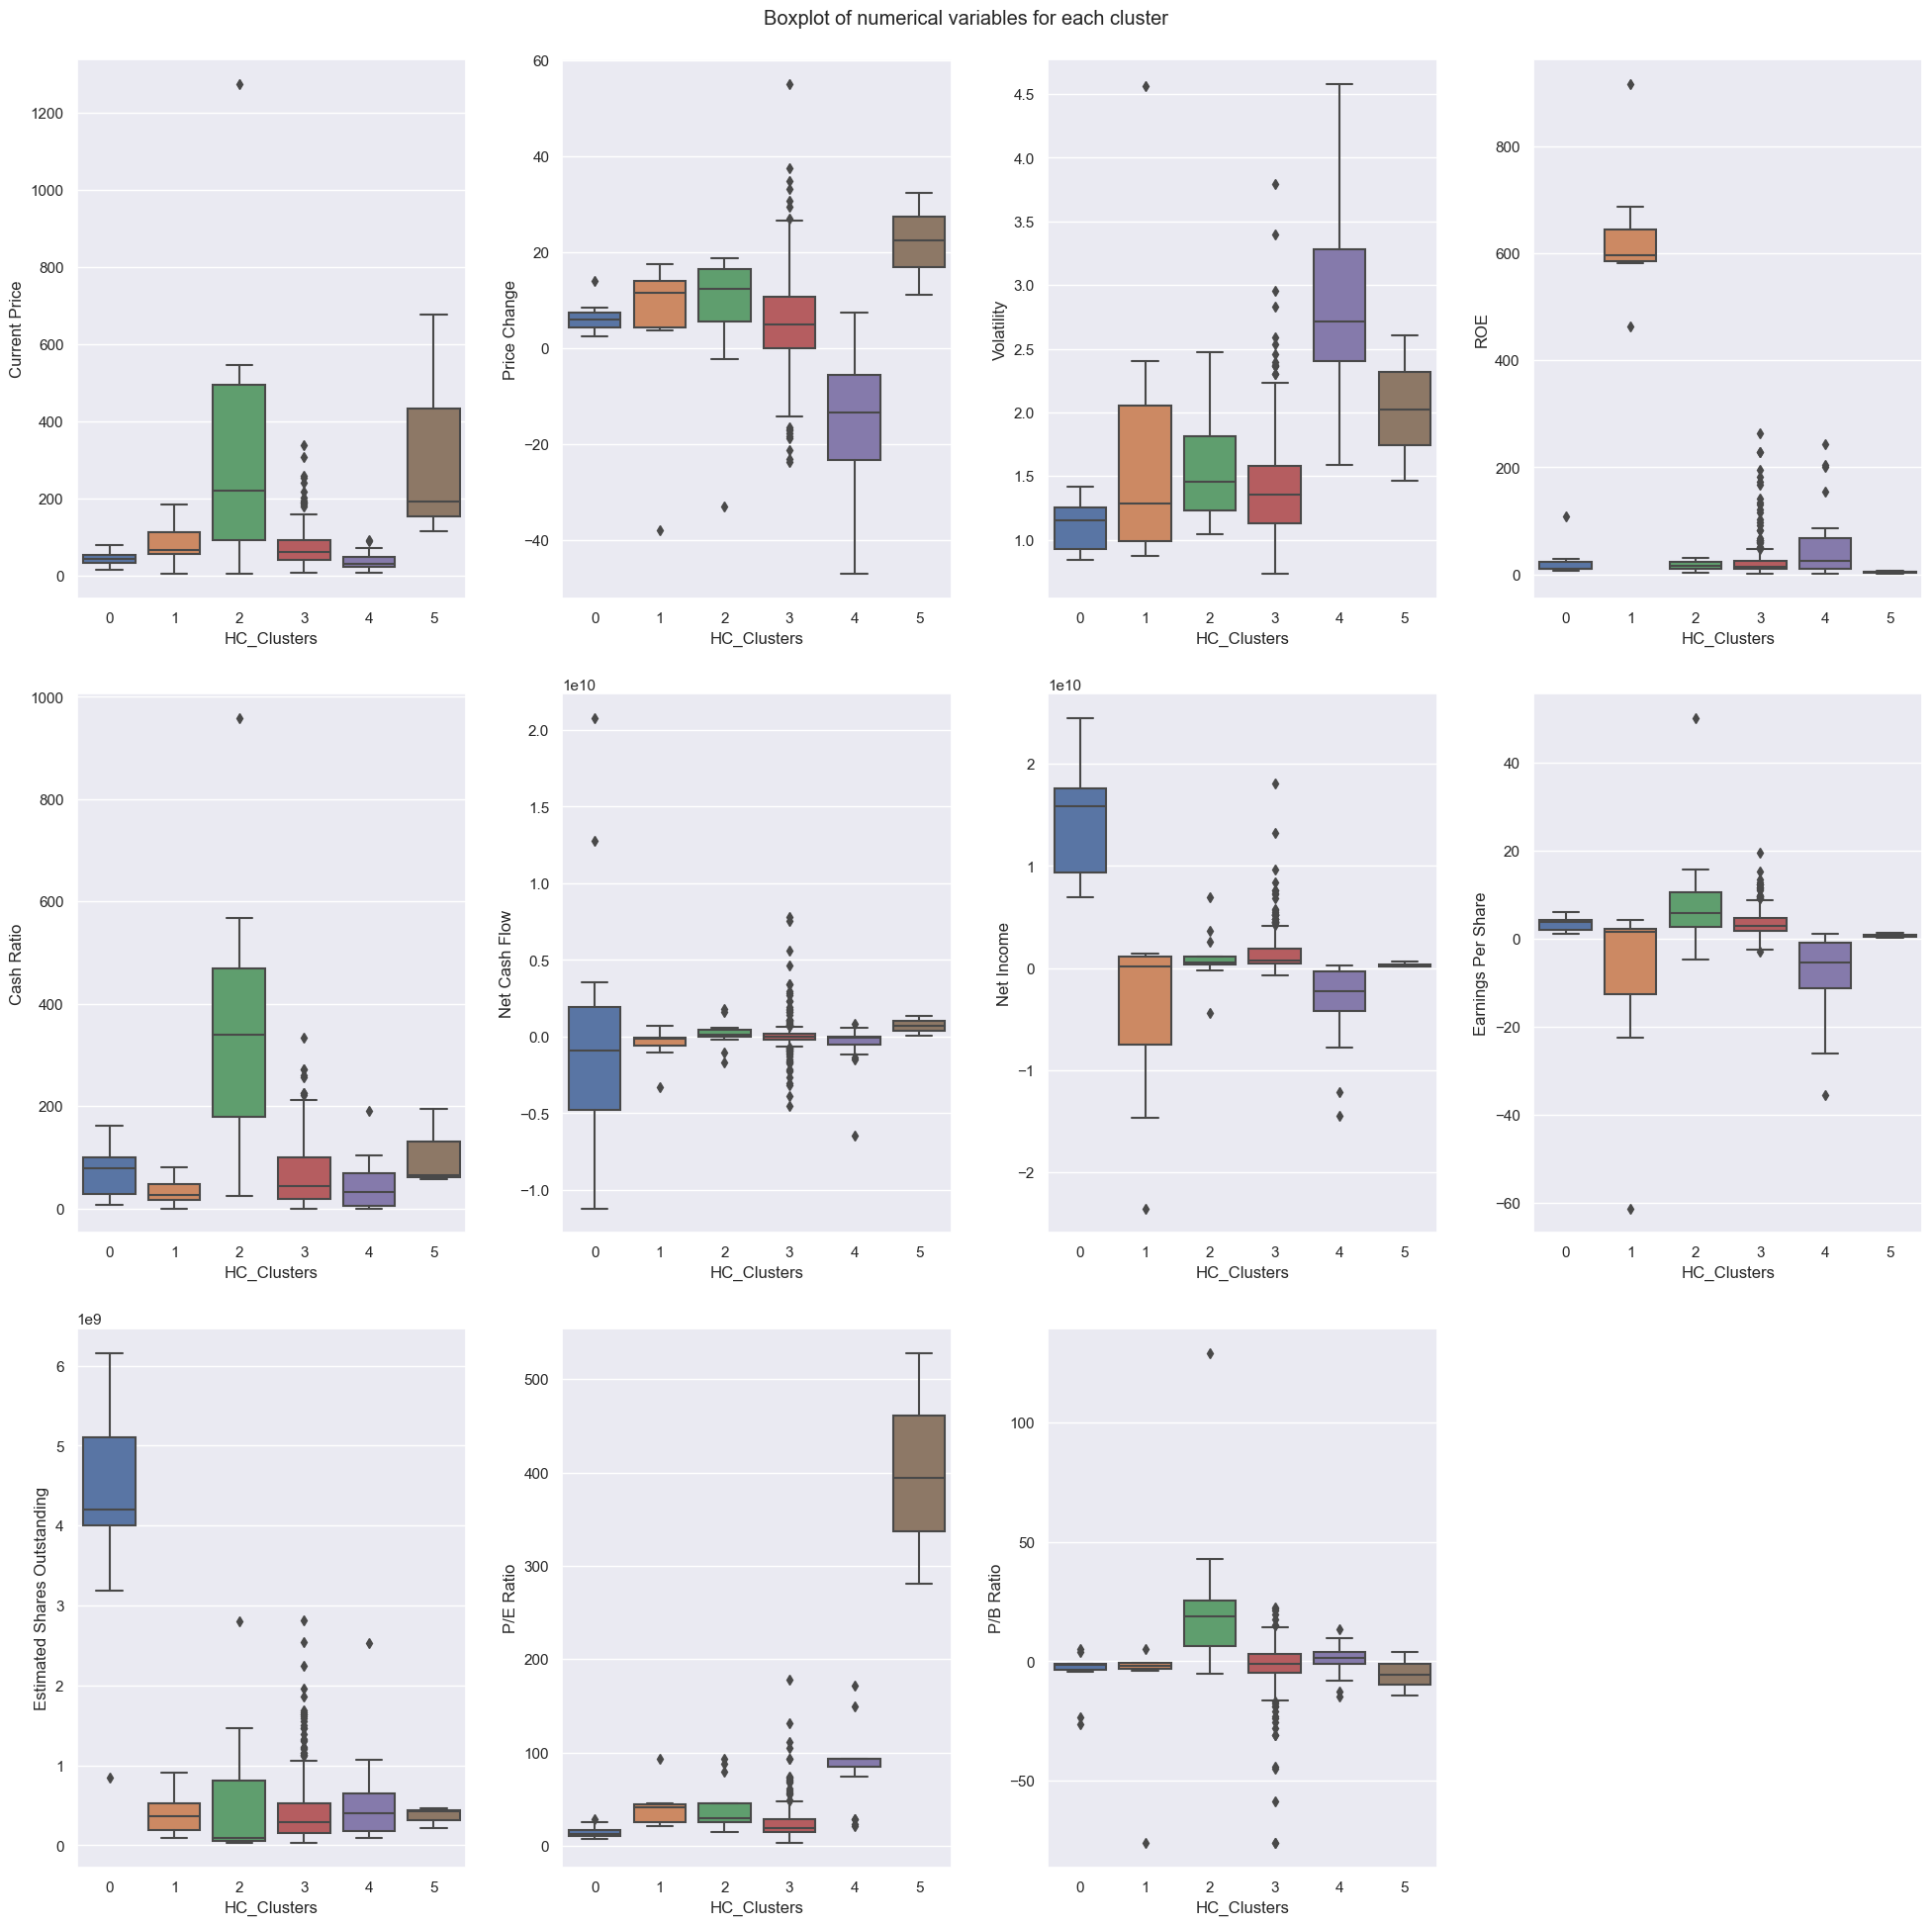

In [72]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

We will look into cluster 2 and 4 only because there are very few companies in other clusters.

**Cluster 2**:
    - Current Price, Price Change, ROE, Net Income, EPS,  are low
    - Volitality, P/E ratio, P/B ratio are high
    - Cash Ratio, Net Cash Flow, Estimated Shares Outstanding are average    
To summarize, the stock exhibits low current price, price change, return on equity (ROE), net income, and earnings per share (EPS), while showing high volatility, price-to-earnings (P/E) ratio, and price-to-book (P/B) ratio. Additionally, it demonstrates average values for cash ratio, net cash flow, and estimated shares outstanding. This combination suggests that the stock may be perceived as underperforming with weaker financial indicators and potentially overvalued in the market.




**Cluster 4**:
    - Net Income, EPS,P/E ratio, P/B ratio are low
    - Net cash flow, are high
    - Current Price, Price Change, Volitality, ROE, Cash Ratio, Net Cash Flow, Cash Ratio, Estimated Shares Outstanding are average    
In summary, a combination of low net income, EPS, P/E ratio, and P/B ratio, along with high net cash flow, and average values for current price, price change, volatility, ROE, cash ratio, net cash flow, and estimated shares outstanding, suggests that the stock may be perceived as a lower-performing stock with weaker financial indicators and a lower valuation. 





## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

- Generally, K-means clustering is known to be faster than Hierarchical Clustering in terms of computational time.
- K-means clustering produces more distinct and well-separated clusters compared to Hierarchical Clustering.
- K-means clustering results in fewer clusters than Hierarchical Clustering. 
- Both algorithms yielded similar clusters based on the outliers within the 11 variables


## Actionable Insights and Recommendations

- Trade&Ahead should begin by assessing the financial goals, risk tolerance, and investment behaviors of their clients. Based on this information, they can then suggest a cluster that aligns with their clients' needs as a potential portfolio of stocks.
- In K-means clustering, cluster 3 consists of stable stocks that exhibit low risk and long-term profitability. These stocks should be considered for inclusion in the portfolio. However, caution should be exercised with underperforming and high-risk stocks in clusters 0 and 1, 